In [46]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Importing the data
d=pd.read_csv('/content/diabetes.csv') 

In [6]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
768,2,90,80,0,0,22.5,0.197,43,0
769,3,140,70,30,20,32.9,0.278,33,1


In [7]:
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# describing about the 
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,3.837873,120.926070,69.130999,20.547341,79.514916,31.987678,0.471650,33.291829,0.350195
std,3.365357,31.963591,19.324158,15.957371,115.110983,7.878191,0.331074,11.791332,0.477340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,126.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
d.shape

(771, 9)

In [44]:
# checking for missing values in the dataset
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
d['Outcome'].value_counts()

0    501
1    270
Name: Outcome, dtype: int64

In [12]:
# We separate the labels x and y for input and output
x = d.drop(columns = 'Outcome', axis=1)
y = d['Outcome']

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
766,1,126,60,0,0,30.1,0.349,47
767,1,93,70,31,0,30.4,0.315,23
768,2,90,80,0,0,22.5,0.197,43
769,3,140,70,30,20,32.9,0.278,33


In [15]:
# Printing the value of y
y

0      1
1      0
2      1
3      0
4      1
      ..
766    1
767    0
768    0
769    1
770    1
Name: Outcome, Length: 771, dtype: int64

In [17]:
# Now we do data standardization to compress the value between 0 to 1 

scale = StandardScaler()
scale.fit(x)

StandardScaler()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [22]:
X.shape, X_train.shape, X_test.shape

((771, 8), (616, 8), (155, 8))

In [34]:
#Importing and training the model
#Using Logistic Regression

model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
#Training accuracy
pred = model.predict(X_train)
train = accuracy_score(pred, Y_train)
print(train) 

0.7922077922077922


In [38]:
#Testing Accuracy
pred1 = model.predict(X_test)
test = accuracy_score(pred1, Y_test)
print(test) 

0.7483870967741936


In [40]:
#Using Linear SVM(Support Vector Machine)

model1 = svm.SVC(kernel='linear')
model1.fit(X_train, Y_train)


SVC(kernel='linear')

In [42]:
#Training accuracy
pred2 = model1.predict(X_train)
train = accuracy_score(pred2, Y_train)
print(train) 

0.7922077922077922


In [43]:
#Testing Accuracy
pred3 = model1.predict(X_test)
test = accuracy_score(pred3, Y_test)
print(test) 

0.7419354838709677


In [ ]:
# When compared with 2 models we can find out slight variation between the models and has a good testing accuracy.

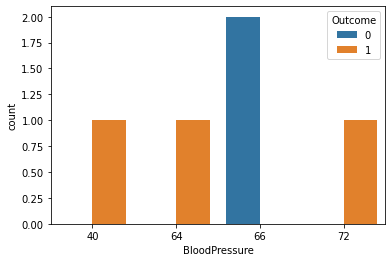

In [52]:
sns.countplot(x='BloodPressure',hue='Outcome',data=d.head())